In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#load the dataset
Data=pd.read_csv("Zoo.csv")

In [ ]:
Data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Exploratory Data Analysis

In [ ]:
Data.shape

(101, 18)

In [ ]:
Data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
Data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
#check the null values
Data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [ ]:
#Duplicate values
Data[Data['animal name'].duplicated(keep=False)]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [ ]:
# drop the multiple value
New_data = Data.drop(index=26).reset_index(drop=True)
New_data.drop('animal name',axis=1,inplace=True)

In [ ]:
New_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
New_data.shape

(100, 17)

# Visualization

#countplot

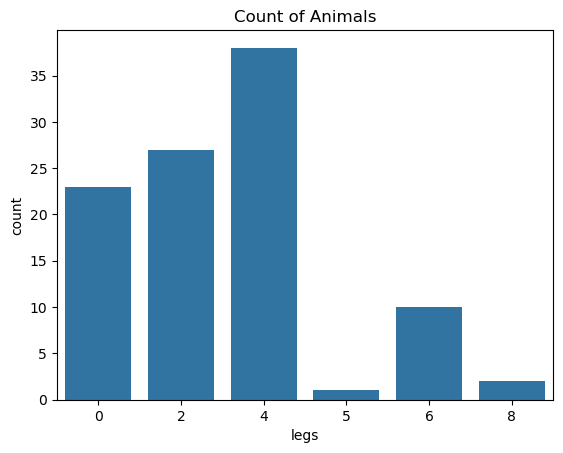

In [ ]:
sns.countplot(x='legs', data=Data)
plt.title('Count of Animals')
plt.show()

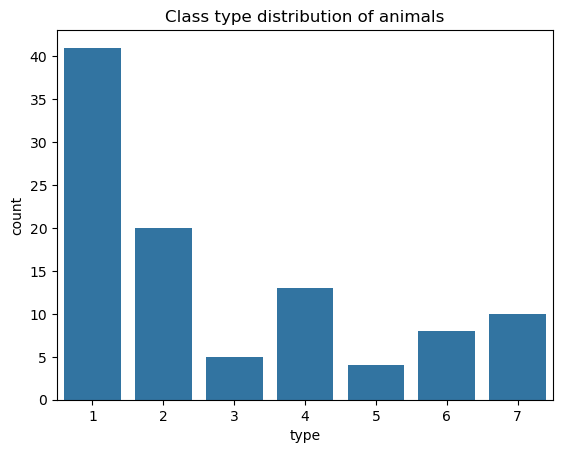

In [ ]:
sns.countplot(x='type', data=Data)
plt.title('Class type distribution of animals')
plt.show()

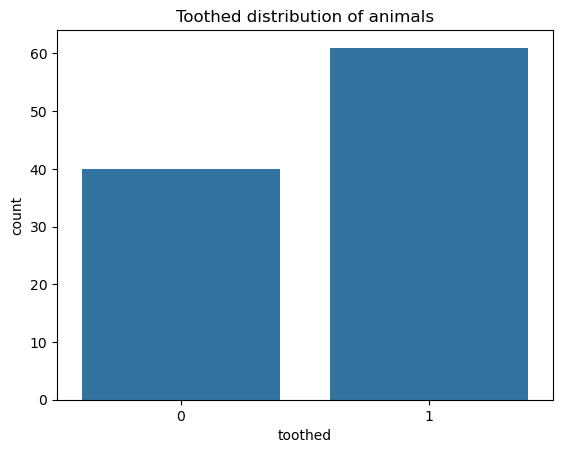

In [ ]:
sns.countplot(x='toothed', data=Data)
plt.title('Toothed distribution of animals')
plt.show()

# Split the dataset into training and testing sets

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
x = New_data.iloc[:,0:16]  #independent variables
y = New_data['type']   #dependent variable

In [ ]:
x


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
y

0     1
1     1
2     4
3     1
4     1
     ..
95    1
96    6
97    1
98    7
99    2
Name: type, Length: 100, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)

(80, 16) (80,)


In [ ]:
print(x_test.shape, y_test.shape)

(20, 16) (20,)


# K-Nearest Neighbors Algorithm(KNN)
#KNN Classification - Supervised Machine Learning Algorithm used for both classification and regression

In [ ]:
array = New_data.values
x= array[:,0:16]
y = array[:,-1]

In [ ]:
x

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [ ]:
#Apply minmax scaling
x=(x-x.min())/(x.max())-x.min()

In [ ]:
x

array([[0.125, 0.   , 0.   , ..., 0.   , 0.   , 0.125],
       [0.125, 0.   , 0.   , ..., 0.125, 0.   , 0.125],
       [0.   , 0.   , 0.125, ..., 0.125, 0.   , 0.   ],
       ...,
       [0.125, 0.   , 0.   , ..., 0.125, 0.   , 0.125],
       [0.   , 0.   , 0.125, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.125, 0.125, ..., 0.125, 0.   , 0.   ]])

In [ ]:
from sklearn.model_selection import KFold

num_folds = 10
kfold = KFold(n_splits=num_folds)

In [ ]:
Model = KNeighborsClassifier(n_neighbors=7)#k=17
results = cross_val_score(Model, x, y, cv=kfold)

In [ ]:
results

array([1. , 0.7, 0.9, 1. , 0.9, 0.8, 0.8, 0.5, 0.7, 0.9])

In [ ]:
print(results.mean()*100)

82.0


# Grid Search Algorithm for Hyperparameter Tuning

In [ ]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
array = New_data.values
x= array[:,0:16]
y = array[:,-1]

In [ ]:
#Apply minmax scaling
x=(x-x.min())/(x.max())-x.min()

In [ ]:
x

array([[0.125, 0.   , 0.   , ..., 0.   , 0.   , 0.125],
       [0.125, 0.   , 0.   , ..., 0.125, 0.   , 0.125],
       [0.   , 0.   , 0.125, ..., 0.125, 0.   , 0.   ],
       ...,
       [0.125, 0.   , 0.   , ..., 0.125, 0.   , 0.125],
       [0.   , 0.   , 0.125, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.125, 0.125, ..., 0.125, 0.   , 0.   ]])

In [ ]:
#n_neighbors = np.array(range(1,40)) # k=1 to 39 all numbers even and odd will be considered
n_neighbors = np.array([2*i+1 for i in range(0,20)]) #only odd number of clusters (1 3 5 7 ... 39) will be considered
param_grid = dict(n_neighbors=n_neighbors) # used to create a python dictionary called param_grid

In [ ]:
param_grid


{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39])}

In [ ]:
n_neighbors

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

In [ ]:
Model = KNeighborsClassifier()
grid = GridSearchCV(estimator=Model, param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


# Visualizing the CV results

In [ ]:
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 41)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv=kfold, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

0     0.98
2     0.95
1     0.94
3     0.92
4     0.88
5     0.84
6     0.82
14    0.79
19    0.79
18    0.79
17    0.79
16    0.79
15    0.79
20    0.79
13    0.79
11    0.79
10    0.79
9     0.79
8     0.79
7     0.79
12    0.79
21    0.75
22    0.72
26    0.71
29    0.71
28    0.71
27    0.71
25    0.71
24    0.71
23    0.71
30    0.67
31    0.64
32    0.63
33    0.59
34    0.59
35    0.59
36    0.59
37    0.58
38    0.58
39    0.57
dtype: float64

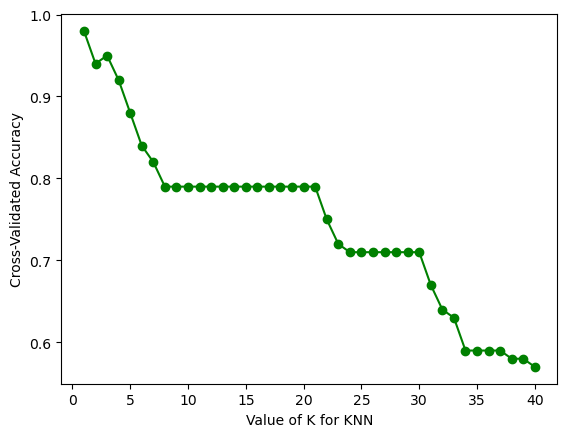

In [ ]:
import matplotlib.pyplot as plt

# plot to see clearly
plt.plot(k_range, k_scores,marker = 'o', c='green')

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
# Determine best k value
Best_k =k_range[np.argmax(k_scores)]
print(f'Best k: {Best_k}')

Best k: 1


In [ ]:
# Evaluate the model with the best k on the test set
best_knn = KNeighborsClassifier(n_neighbors=Best_k)
best_knn.fit(x_train, y_train)
test_accuracy = best_knn.score(x_train, y_train)
print(f'Test accuracy with best k ({best}): {test_accuracy}')

Test accuracy with best k (1): 1.0


# Visualize Decision Boundaries

In [ ]:
# Perform PCA for dimensionality reduction to 2 components
PCA = PCA(n_components=2)
XPCA_train = PCA.fit_transform(x_train)

In [ ]:
# Initialize kNN classifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(XPCA_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Plotting decision regions
h = .02  # step size in the mesh
x_min, x_max = XPCA_train[:, 0].min() - 1, XPCA_train[:, 0].max() + 1
y_min, y_max = XPCA_train[:, 1].min() - 1, XPCA_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
# Predicting on the mesh grid
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

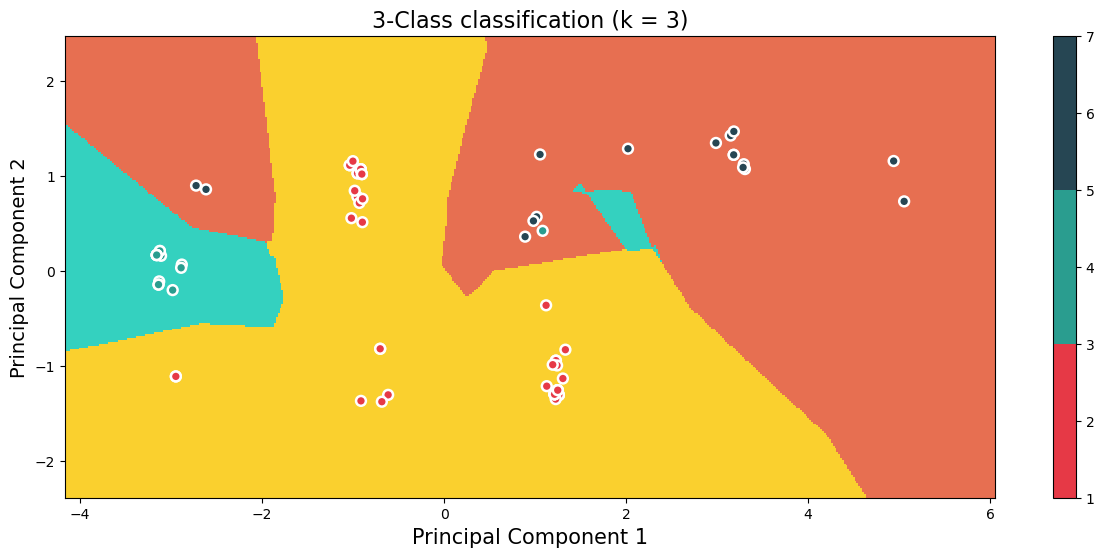

In [ ]:
# Create a color plot with decision boundaries
color_light = ListedColormap(['#FAD02E', '#34D1BF', '#E76F51'])  # Light colors
color_bold = ListedColormap(['#E63946', '#2A9D8F', '#264653'])  # Bold colors

plt.figure(figsize=(15, 6))
plt.pcolormesh(xx, yy, Z, cmap=color_light)

# Plot the training points
plt.scatter(XPCA_train[:, 0], XPCA_train[:, 1], c=y_train, cmap=color_bold, edgecolor='#FFFFFF', s=50, linewidth=1.8)
plt.xlabel('Principal Component 1',fontsize=15)
plt.ylabel('Principal Component 2',fontsize=14)

# Add a legend--labels and the plot title for better readability
plt.colorbar()
plt.title("3-Class classification (k = 3)",fontsize=16)
plt.show()

# Interview Questions:

1. What are the key hyperparameters in KNN?

Key hyperparameters in K-Nearest Neighbors (KNN) are:

K (n_neighbors): The number of neighbors to consider when making predictions. A smaller value (like 1) leads to more flexible and sensitive models, while a larger value makes the model more stable but less sensitive to local patterns.

Distance Metric (metric): Defines how distance between points is measured. Common choices include:Euclidean distance (default) for continuous variables.

Weights (weights): Determines how neighbors contribute to the prediction.Uniform-All neighbors have equal weight.

Distance-based: Closer neighbors have more influence than distant ones.

Leaf Size (leaf_size): Used with tree-based algorithms for balancing the speed of tree construction and query performance.

2. What distance metrics can be used in KNN?
   
In K-Nearest Neighbors (KNN), several distance metrics can be used to measure the similarity between data points:

Euclidean Distance:The most common metric, it calculates the straight-line distance between two points.Suitable for continuous variables.

Manhattan Distance (L1 Distance):Measures the distance along axes at right angles (like city blocks or grids).Useful for grid-like data or when you want less sensitivity to large differences.

Minkowski Distance:A generalization of Euclidean and Manhattan distances.

Chebyshev Distance:Measures the greatest difference along any coordinate dimension.

Cosine Similarity:Measures the cosine of the angle between two vectors, focusing on direction rather than magnitude.Common in text or high-dimensional data.
